<a href="https://colab.research.google.com/github/hgstyler/SEM-Denoise-Project/blob/main/OpenCV_Denoise_Filter_07222022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Module Load**###

In [ ]:
import os
import sys
import cv2
from google.colab.patches import cv2_imshow
import skimage
import numpy as np
from matplotlib import pyplot as plt

# module version check
print(f'OpenCV version: {cv2.__version__}')
print(f'SK Image version: {skimage.__version__}')
print(f'Numpy version: {np.__version__}')

OpenCV version: 4.6.0
SK Image version: 0.18.3
Numpy version: 1.21.6


###**Image Variables Assignment**###

**Information**  

| Name | Magnification | Voltage || Name | Magnification | Voltage |
|:--------:|:--------:|:------:||:--------:|:--------:|:------:|
|src011|x30k|30kV||src021|x50k|30kV|
|src012|x50k|30kV||src022|x50k|20kV|
|src013|x100k|30kV||src023|x50k|10kV|

In [ ]:
# Image variable assignment
# Before excution, google drive mount should be connected.

src011 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x30k_30kV_20220720.tif')
src012 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x50000_30kV_20220720.tif')
src013 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x100k_30kV_20220720.tif')

src021 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x50k_30kV_20220720.tif')
src022 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x50k_20kV_20220721.tif')
src023 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/Tin_ball_x50k_10kV_20220722.tif')

###**Raw Image of Tin Balls**###

- Left: Magnification: x30k, x50k, x100k / Voltage: 30kV
- Right: Magnification: x50k / Voltage: 30kV, 20kV, 10kV

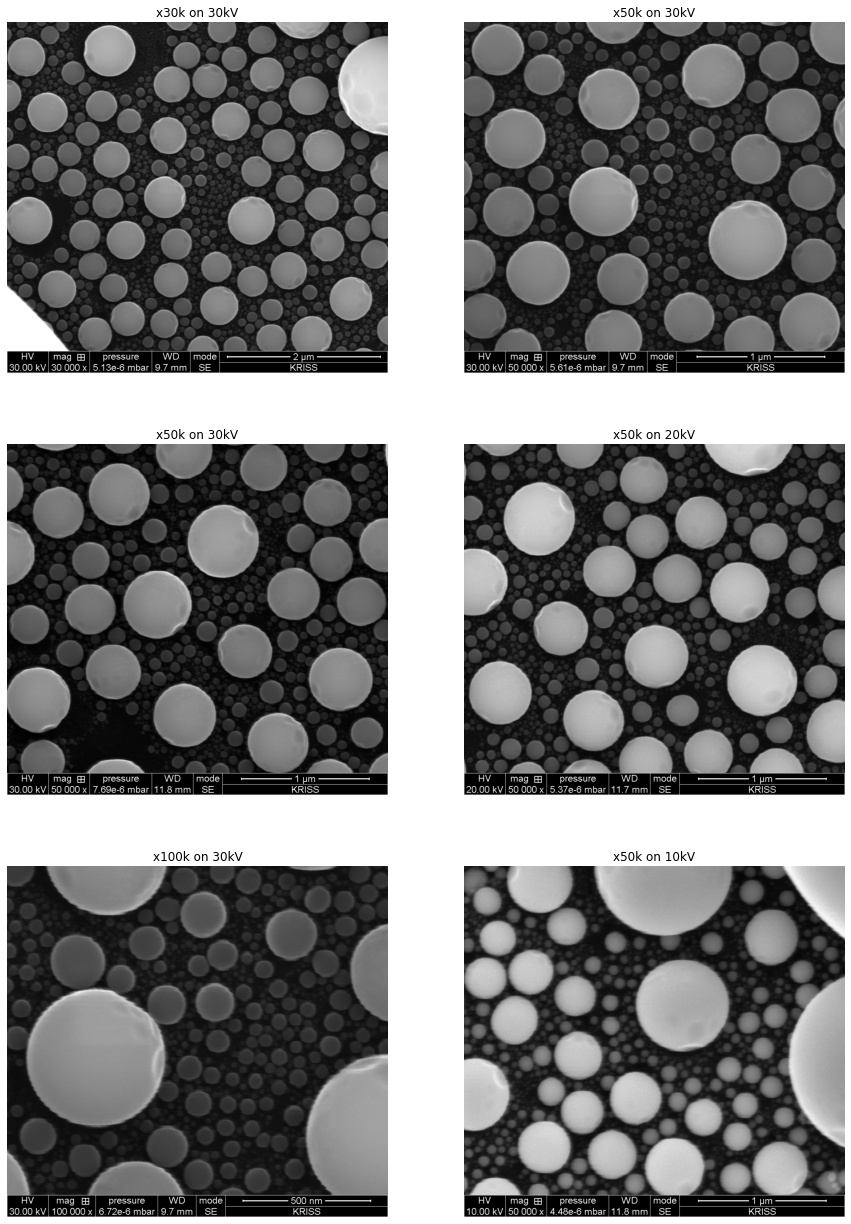

In [ ]:
# plot raw images using original vairiables (src011, src012, src013, src021, src022, src023)
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2

# list variables for image and subplot title
raw_image = [src011, src021, src012, src022, src013, src023]
raw_image_title = ['x30k on 30kV', 'x50k on 30kV', 'x50k on 30kV', 'x50k on 20kV', 'x100k on 30kV', 'x50k on 10kV']

# plotting raw images
for i in range(6):
    plt.subplot(row, col, i+1)
    plt.imshow(raw_image[i])
    plt.title(raw_image_title[i])
    plt.axis("off")

# save results (tif, pdf files)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/raw_images_20220722.tif')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/raw_images_20220722.pdf')

###**Noise Generation, Noise reduction filter codes**###  

```Python
import cv2
import skimage

img = skimage.util.random_noise(src012, mode="gaussian")
# mode = "gaussian" / "localvar" / "poisson" / "salt" / "pepper" / "s&p" / "speckle"  

img = cv2.bilateralFilter(src012, -1, sigmaColorDev, sigmaSpaceDev)
# sigmaColorDev & sigmaSpaceDev in range from 0 to 100
# "-1" means that a neighboring pixel distance is automatically determined by sigmaSpaceDev value.  
# bilateral filter can implement only uint8 and float32.  

img = cv2.GaussianBlur(src012, (0, 0), sigma)
# (0,0) means a kernel size of gaussian distribution is automatically determined by sigma.
```

###**Bilateral Filter: changing sigmaColor Dev. & sigmaSpace Dev. (x50k 30kV)**###

- Changing sigmaColor Dev. from 0 to 100 (100 means Gaussian filter)

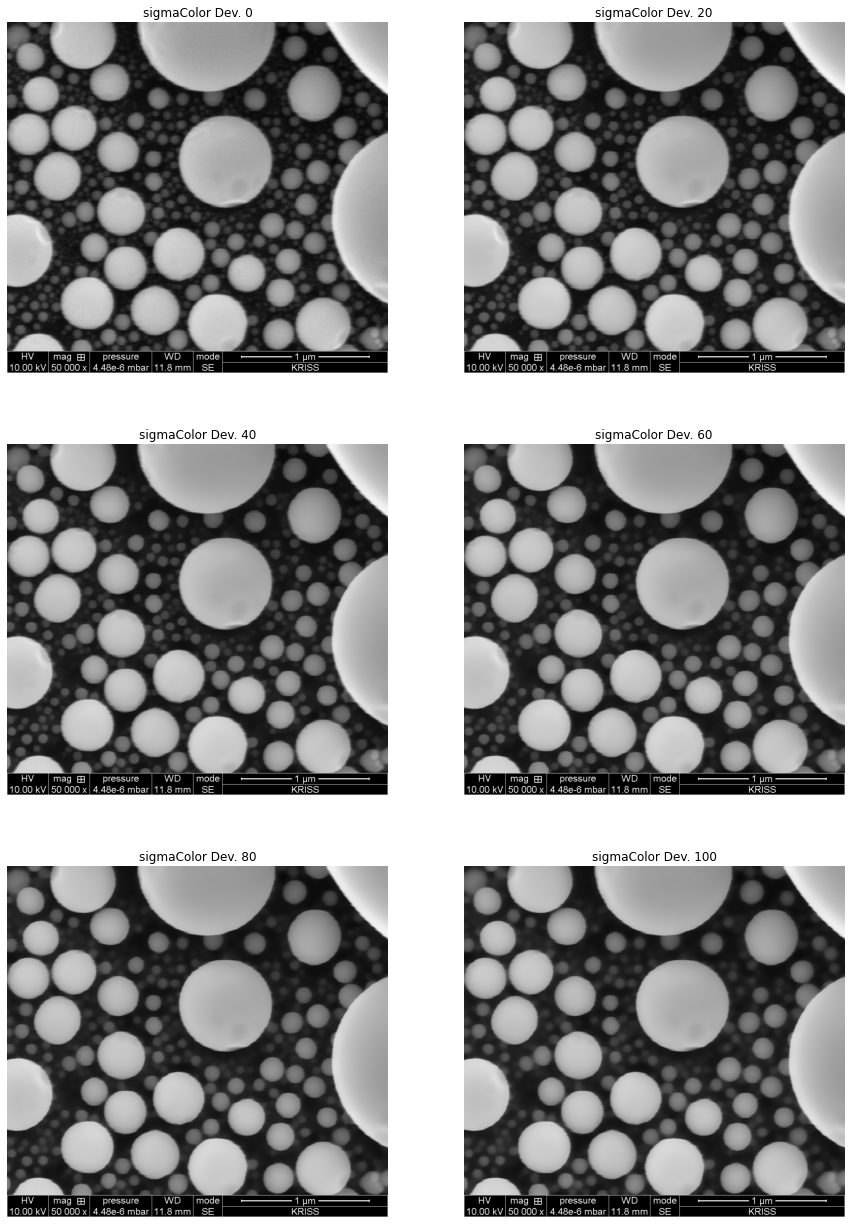

In [ ]:
# plot raw images using original vairiables (src011, src012, src013, src021, src022, src023)
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row =3
col =2
i = 1

# plotting bilater filtered images according to sigma color deviation from 0 to 100
# 100 represents Gaussian blur filter
# raw image: x50k, 10kV
for sigmaColorDev in range(0, 120, 20):
    plt.subplot(row, col, i)
    src023_bilateral = cv2.bilateralFilter(src023, -1, sigmaColorDev, 10)
    plt.imshow(src023_bilateral)
    plt.title(f"sigmaColor Dev. {sigmaColorDev}")
    plt.axis("off")
    i += 1

# save results (tif, pdf files)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/sigmaColorDev_images_20220722.tif')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/sigmaColorDev_images_20220722.pdf')

- Changing sigmaSpace Dev. from 0 to 100 (SigmaColor Dev fixed to 10)

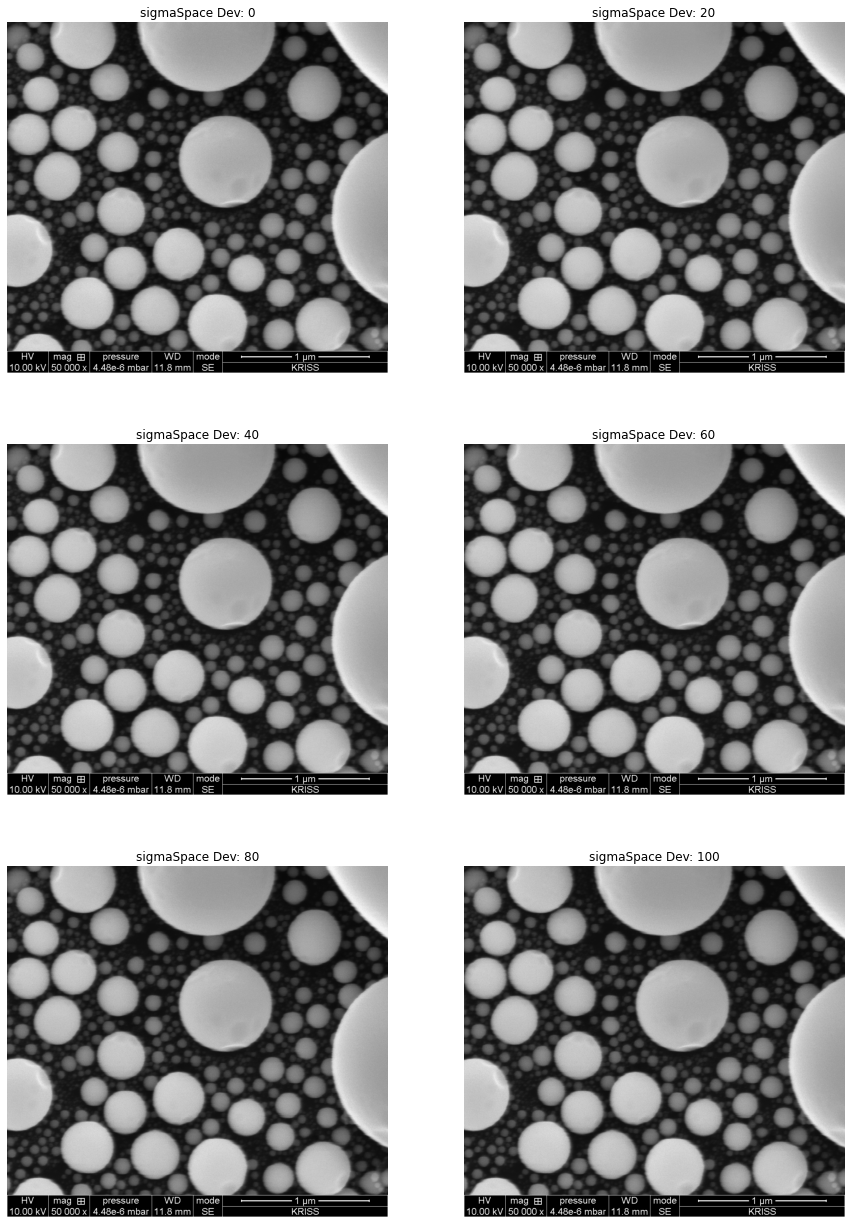

In [ ]:
# plot raw images using original vairiables (src011, src012, src013, src021, src022, src023)
# plot dimension: row(3), column(2)
# plot size: 15 inch x 22 inch
plt.figure(figsize=(15, 22))
row = 3
col = 2
i = 1

# plotting bilater filtered images according to sigma space deviation from 0 to 100
# raw image: x50k, 10kV
for sigmaSpaceDev in range(0, 120, 20):
    plt.subplot(row, col, i)
    src023_bilateral = cv2.bilateralFilter(src023, -1, 10, sigmaSpaceDev)
    plt.imshow(src023_bilateral)
    plt.title(f'sigmaSpace Dev: {sigmaSpaceDev}')
    plt.axis("off")
    i += 1

# save results (tif, pdf files)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/sigmaSpaceDev_images_20220722.tif')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/sigmaSpaceDev_images_20220722.pdf')

###**Noise Filter used too less (x50k, x30kV)**###

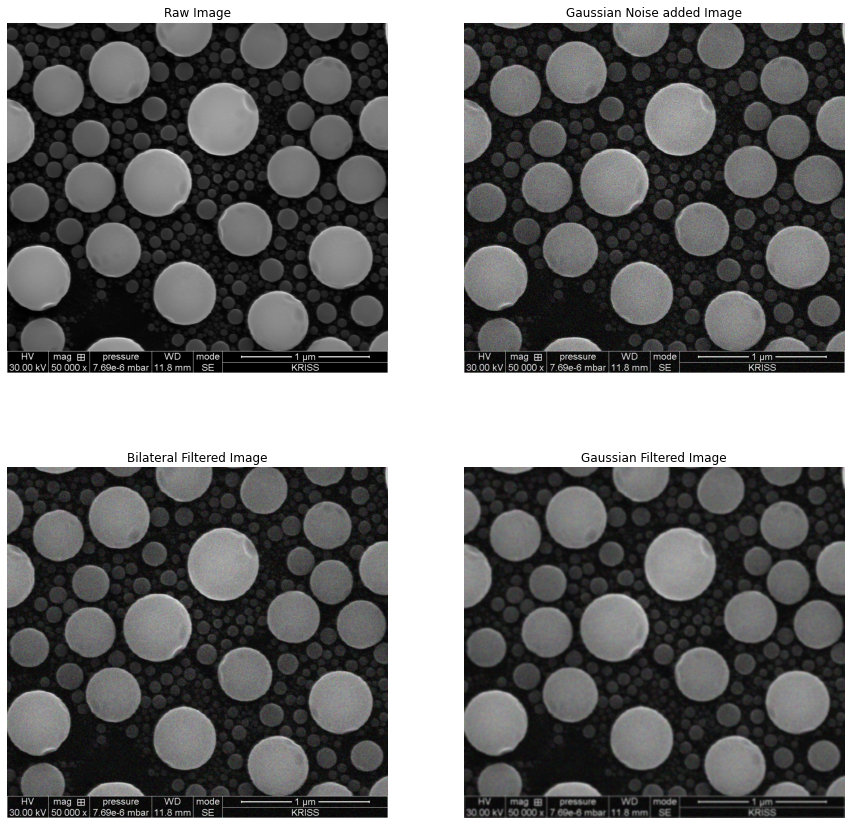

In [ ]:
# plot raw images using original vairiables (src011, src012, src013, src021, src022, src023)
# plot dimension: row(2), column(2)
# plot size: 15 inch x 15 inch
plt.figure(figsize=(15,15))
row = 2
col = 2

# Gaussian noise addition
src012_noise_001 = skimage.util.random_noise(src012, mode="gaussian")
src012_noise_32 = src012_noise_001.astype('float32') # data type conversion to float32, which is compatible with cv2.bilateralfilter()

# Bilateral filtered the gaussian noised image (sigma color dev. = 1 / sigma space dev. = 1)
src012_noise_001_to_bilateral = cv2.bilateralFilter(src012_noise_32, -1, 1, 1)

# Gaussian filtered the gaussian noised image (sigma dev. = 2)
src012_noise_001_to_gaussian = cv2.GaussianBlur(src012_noise_001, (0, 0), 2)

# list variables for image and subplot title
noise_image_001 = [src012, src012_noise_001, src012_noise_001_to_bilateral, src012_noise_001_to_gaussian]
noise_image_001_title = ["Raw Image", "Gaussian Noise added Image", "Bilateral Filtered Image", "Gaussian Filtered Image"]

# plotting raw image, gaussian noised image, bilateral filtered noised image, and gaussian filtered image
# raw image: x50k, 30kV
for i in range(4):
    plt.subplot(r,c,i+1)
    plt.imshow(noise_image_001[i])
    plt.title(noise_image_001_title[i])
    plt.axis("off")

# save results (tif, pdf files)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/filter_less_images_20220722.tif')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/filter_less_images_20220722.pdf')

###**Noise Filter used too much (x50k, x30kV)**###

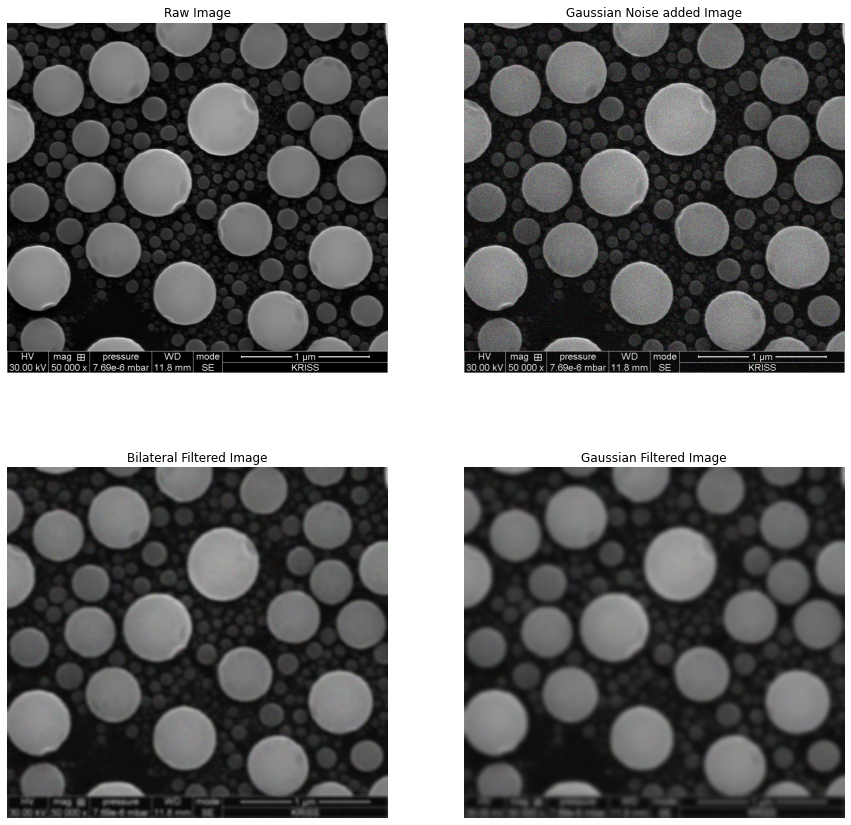

In [ ]:
# plot raw images using original vairiables (src011, src012, src013, src021, src022, src023)
# plot dimension: row(2), column(2)
# plot size: 15 inch x 15 inch
plt.figure(figsize=(15,15))
r=2
c=2

# Bilateral filtered the gaussian noised image (sigma color dev. = 5 / sigma space dev. = 5)
src012_noise_002_to_bilateral = cv2.bilateralFilter(src012_noise_32, -1, 5, 5)

# Gaussian filtered the gaussian noised image (sigma dev. = 6)
src012_noise_002_to_gaussian = cv2.GaussianBlur(src012_noise_001, (0, 0), 6)

# list variables for image and subplot title
noise_image_002 = [src012, src012_noise_001, src012_noise_002_to_bilateral, src012_noise_002_to_gaussian]
noise_image_002_title = ["Raw Image", "Gaussian Noise added Image", "Bilateral Filtered Image", "Gaussian Filtered Image"]

# plotting raw image, gaussian noised image, bilateral filtered noised image, and gaussian filtered image
# raw image: x50k, 30kV
for i in range(4):
    plt.subplot(r,c,i+1)
    plt.imshow(noise_image_002[i])
    plt.title(noise_image_002_title[i])
    plt.axis("off")

# save results (tif, pdf files)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/filter_much_images_20220722.tif')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Image/SEM/filter_much_images_20220722.pdf')